In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

CNN - хорошо решает задачи с изображением.  
Обычная глубокоя нейронная сеть справляется с маленькими изображениями. Если взять картинку 100х100, то получим 10000 пикселей. Если первый слой будет иметь только 1000 нейронов, получим 10000 * 1000 = 10000000 связей. Это только 1-ый слой.

Свёрточный слой.  
Особенность заключается в том, что нейроны в первом свёрточном слое связаны не с каждым одиночным пикселем во входном изображении, а только с пикселями в собственных рецепторных полях(прямоугольник)  
Особенности:  
Изображение не нужно разглаживать, как для обычной нейронной сети.  
Для того, чтобы слой имел одинаковую высоту и ширину, вокруг входов добавляются нули(zero padding)  
Можно связать крупный слой с гораздо меньшим слоем регулируя рецепторные поля

In [ ]:
photo = datasets.load_sample_image('china.jpg')/255.

(-0.5, 639.5, 426.5, -0.5)

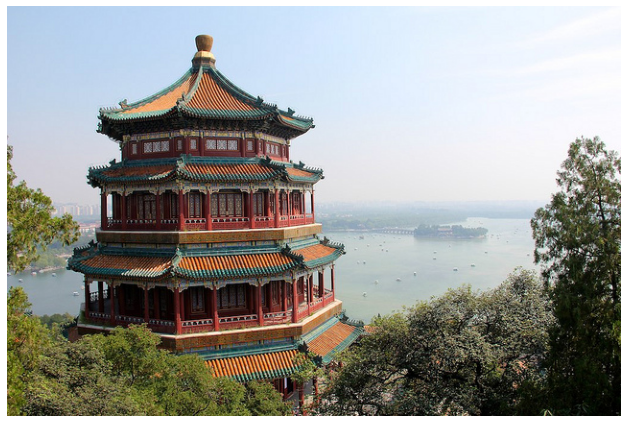

In [ ]:
plt.figure(figsize=(11, 9))
plt.imshow(datasets.load_sample_image('china.jpg'))
plt.axis('off')

(-0.5, 639.5, 426.5, -0.5)

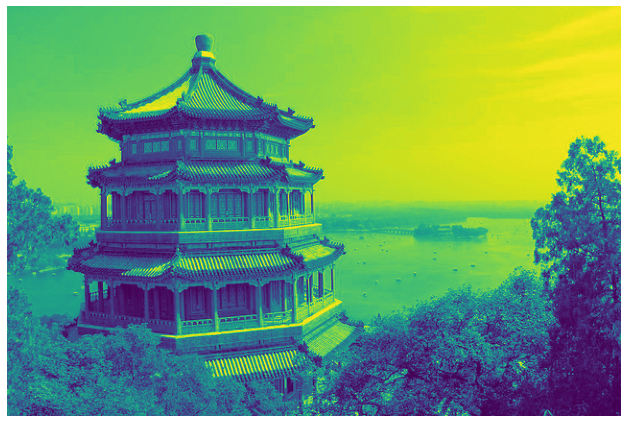

In [ ]:
#Red
plt.figure(figsize=(11, 9))
plt.imshow(datasets.load_sample_image('china.jpg')[:,:, 0])
plt.axis('off')

(-0.5, 639.5, 426.5, -0.5)

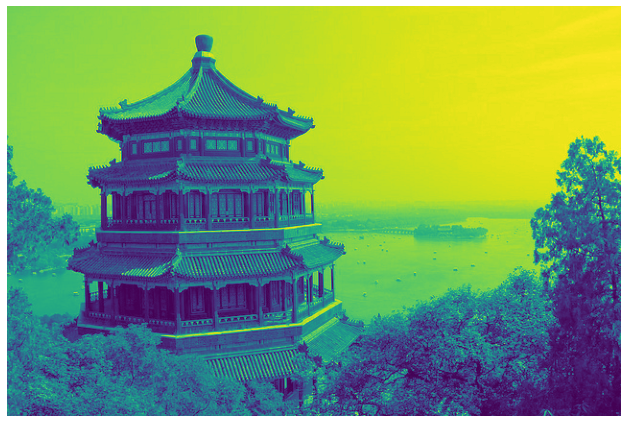

In [ ]:
#Green
plt.figure(figsize=(11, 9))
plt.imshow(datasets.load_sample_image('china.jpg')[:,:, 1])
plt.axis('off')

(-0.5, 639.5, 426.5, -0.5)

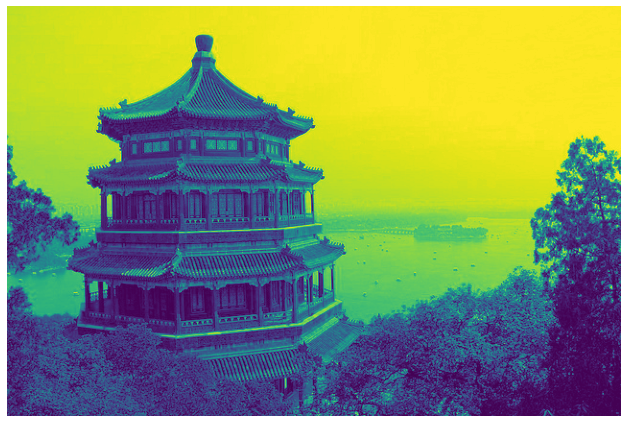

In [ ]:
#Blue
plt.figure(figsize=(11, 9))
plt.imshow(datasets.load_sample_image('china.jpg')[:,:, 2])
plt.axis('off')

In [ ]:
photo = np.array([photo])
batch_size, height, width, channels = photo.shape

Фильтры  
Веса нейронов могут быть представлены как небольшие изображения рецепторного поля - Фильтры, свёрточные ядра.  

In [ ]:
# кастомные фильтры
filters = np.zeros(shape=(7, 7, channels, 2))
filters[:, 3, :, 0] = 1 # фильтр с вертикальной белой линией
filters[3, :, :, 1] = 1 # фильтр с горизонтальной белой линией

#Нейроны использующие такие фильтры, будут игнорировать всё, кроме
#вертикальной\горизонтальной линии в своём рецепторном поле
#Произведение везде будет выдавать ноль, кроме центральных линий

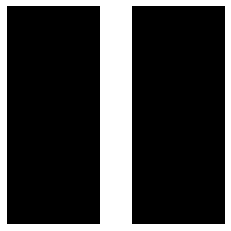

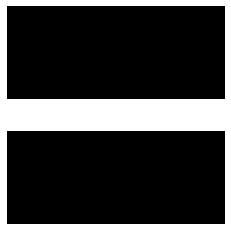

In [ ]:
for f in range(2):
    plt.imshow(filters[:, :, :, f])
    plt.axis('off')
    plt.show()

Слой с нейронами, использующими один и тот же фильтр выдаёт - карту признаков  
Свёрточный слой в действительности имеет множество фильтров(гиперпараметр) и выдаёт по 1-ой карте признаков на фильтр, поэтому выход свёрточного слоя представляется в 3х измерениях.

Входные изображения также состоят из множества подслоёв, по одному на цветовой канал(изображения выше)

В TF изображение представляется в виде: [высота, ширина, каналы]  
Мини-пакет: [размер пакета, высота, ширина, каналы]

In [ ]:
out = tf.nn.conv2d(photo, filters, strides=1, padding='SAME')
# photo - 4x мерный тензор
# filters - 4x мерный тензор

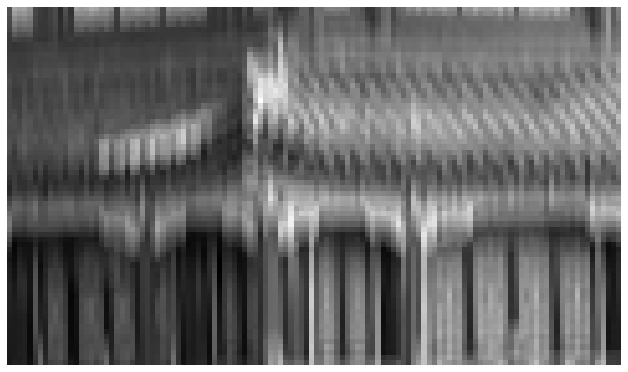

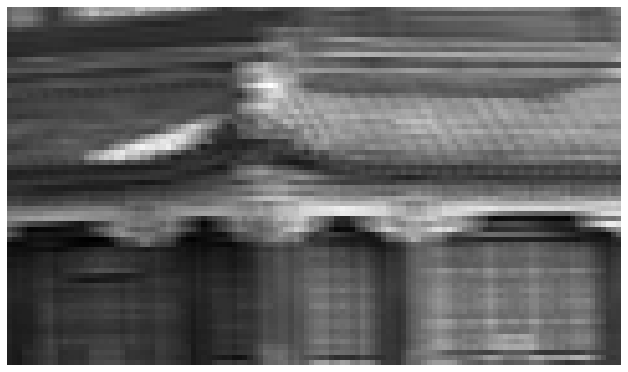

In [ ]:
for f in range(2):
    plt.figure(figsize=(11, 9))
    plt.imshow(out[0, 150:220, 130:250, f], 'gray')
    plt.axis('off')
    plt.show()

In [ ]:
conv = keras.layers.Conv2D(filters=3, kernel_size=7, strides=1, padding='same',
                           activation='relu')
conv_out = conv(photo)

In [ ]:
conv_out.shape

TensorShape([1, 427, 640, 3])

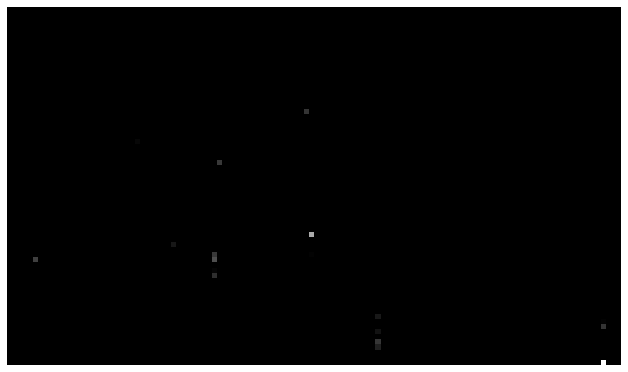

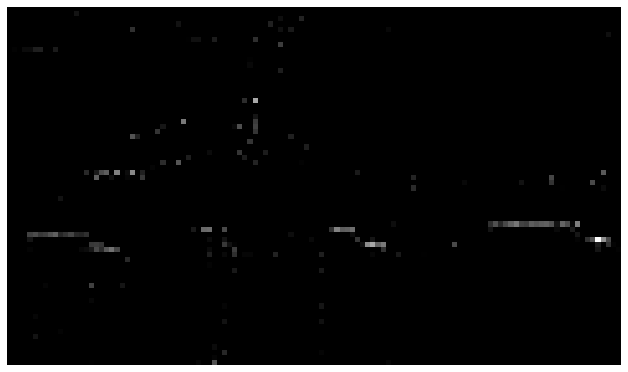

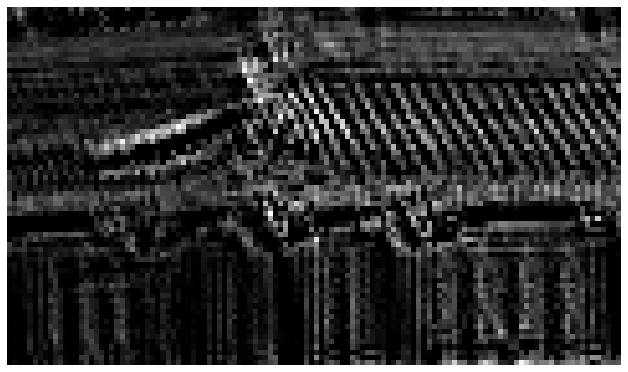

In [ ]:
for f in range(3):
    plt.figure(figsize=(11, 9))
    plt.imshow(conv_out[0, 150:220, 130:250, f], 'gray')
    plt.axis('off')
    plt.show()

Объединяющие слои(субдискретизирующие слои)  
Данные слои нужны, чтобы проредить (сжать) входное изображение.
Объединение по максимуму - на следующий слой попадает только максимальное входное значение в каждом рецепторном поле  

In [ ]:
max_pool = keras.layers.MaxPool2D(2, strides=5)
out = max_pool(photo)

(-0.5, 127.5, 85.5, -0.5)

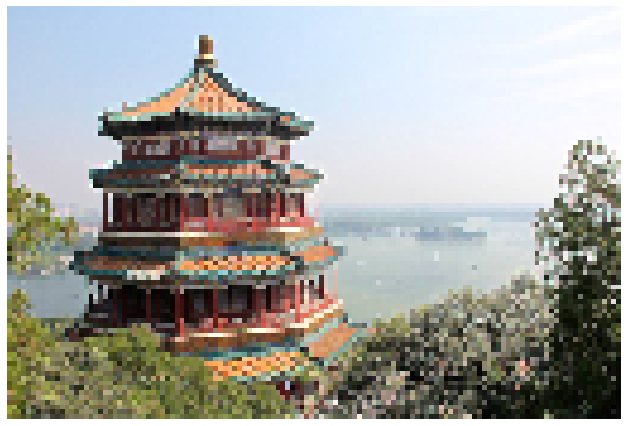

In [ ]:
plt.figure(figsize=(11, 9))
plt.imshow(out[0])
plt.axis('off')

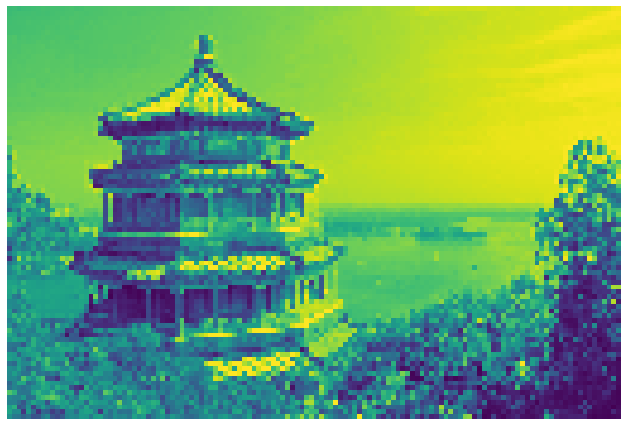

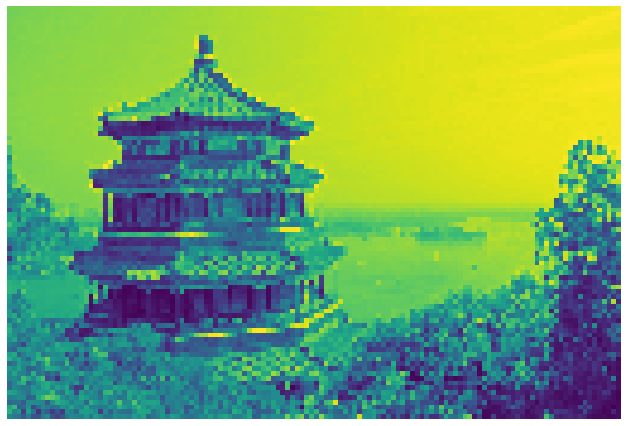

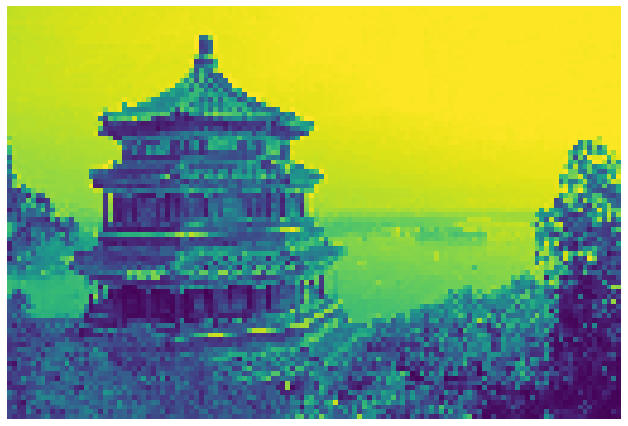

In [ ]:
for f in range(3):
    plt.figure(figsize=(11, 9))
    plt.imshow(out[0, :, :, f])
    plt.axis('off')
    plt.show()

In [ ]:
out.shape

TensorShape([1, 86, 128, 3])

In [ ]:
def plot_cat_history(history, epochs):
    rng = range(epochs)
    plt.figure(figsize=(9, 7))
    plt.plot(rng, history['loss'], label="loss")
    plt.plot(rng, history['sparse_categorical_accuracy'], label="accuracy")
    plt.plot(rng, history['val_loss'], label='val_loss')
    plt.plot(rng, history['val_sparse_categorical_accuracy'], label='val_accuracy')
    plt.legend()

# CNN architectures

Типовая архитектура: укладывание стопкой несколько свёрточных слоёв(за каждым слой функции активации ReLU), объединяющий слой, ещё несколько свёрточных, снова объед и т.д. На верхушки обычная нейронная сеть состоящая из неск. слоёв  
input->conv layers(with activation layers ReLU)->pooling layers-> ... -> Some connected layers -> out layer  

Замечание:  
Чем испоользовать 1 слой с ядром 5x5, лучше использовать 2 слоя с ядрами 3x3. Исключение 1-ый слой.

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4422102/4422102 [==============================] - 0s 0us/step


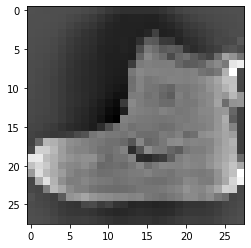

In [ ]:
plt.imshow(X_train[0, :, :, 0], 'gray')

In [ ]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=64, kernel_size=7, activation='relu', padding='same', input_shape=[28, 28, 1]))
cnn.add(keras.layers.MaxPooling2D(2))
cnn.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
cnn.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
cnn.add(keras.layers.MaxPooling2D(2))
cnn.add(keras.layers.Conv2D(256, 3, activation='relu', padding='same'))
cnn.add(keras.layers.Conv2D(256, 3, activation='relu', padding='same'))
cnn.add(keras.layers.MaxPooling2D(2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(units=128, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(units=64, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 256)         2

In [ ]:
cnn.compile(optimizer=keras.optimizers.Nadam(),
            loss=keras.losses.sparse_categorical_crossentropy,
            metrics=keras.metrics.sparse_categorical_accuracy)

Epoch 1/15
1719/1719 [==============================] - 785s 456ms/step - loss: 0.5674 - sparse_categorical_accuracy: 0.8062 - val_loss: 0.3460 - val_sparse_categorical_accuracy: 0.8746
Epoch 2/15
1719/1719 [==============================] - 783s 455ms/step - loss: 0.4053 - sparse_categorical_accuracy: 0.8633 - val_loss: 0.3215 - val_sparse_categorical_accuracy: 0.8876
Epoch 3/15
1719/1719 [==============================] - 783s 455ms/step - loss: 0.3521 - sparse_categorical_accuracy: 0.8801 - val_loss: 0.2958 - val_sparse_categorical_accuracy: 0.8914
Epoch 4/15
1719/1719 [==============================] - 787s 458ms/step - loss: 0.3245 - sparse_categorical_accuracy: 0.8901 - val_loss: 0.2770 - val_sparse_categorical_accuracy: 0.8978
Epoch 5/15
1719/1719 [==============================] - 802s 467ms/step - loss: 0.3008 - sparse_categorical_accuracy: 0.8979 - val_loss: 0.3068 - val_sparse_categorical_accuracy: 0.8934
Epoch 6/15
1719/1719 [==============================] - 808s 470ms/ste

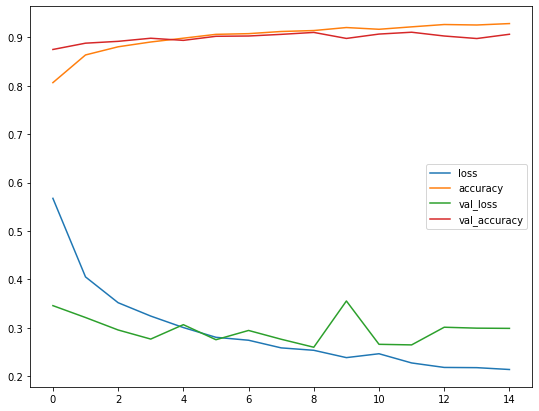

In [ ]:
hist = cnn.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))
plot_cat_history(hist.history, 15)

# LeNET-5

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
tmp = np.zeros((60000, 32, 32))
tmp[:, 2:-2, 2:-2] += X_train_full
X_train_full = tmp
tmp = np.zeros((10000, 32, 32))
tmp[:, 2:-2, 2:-2] += X_test
X_test = tmp

X_train, X_val = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_val = y_train_full[:-5000], y_train_full[-5000:]
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_val - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_val = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
lenet5 = keras.models.Sequential()
lenet5.add(keras.layers.Conv2D(filters=6, kernel_size=5, activation=keras.activations.tanh, input_shape=[32, 32, 1]))
lenet5.add(keras.layers.AveragePooling2D(strides=2))
lenet5.add(keras.layers.Conv2D(filters=16, kernel_size=5, activation=keras.activations.tanh))
lenet5.add(keras.layers.AveragePooling2D(strides=2))
lenet5.add(keras.layers.Conv2D(filters=120, kernel_size=5, activation=keras.activations.tanh) )
lenet5.add(keras.layers.Flatten())
lenet5.add(keras.layers.Dense(84, 'tanh'))
lenet5.add(keras.layers.Dense(10, 'softmax'))

lenet5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_9 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_10 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_4 (Flatten)         (None, 120)              

In [ ]:
lenet5.compile(optimizer=keras.optimizers.Nadam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

Epoch 1/11
1719/1719 [==============================] - 40s 22ms/step - loss: 0.4675 - sparse_categorical_accuracy: 0.8323 - val_loss: 0.3924 - val_sparse_categorical_accuracy: 0.8578
Epoch 2/11
1719/1719 [==============================] - 37s 21ms/step - loss: 0.3437 - sparse_categorical_accuracy: 0.8759 - val_loss: 0.3233 - val_sparse_categorical_accuracy: 0.8794
Epoch 3/11
1719/1719 [==============================] - 38s 22ms/step - loss: 0.3059 - sparse_categorical_accuracy: 0.8888 - val_loss: 0.3179 - val_sparse_categorical_accuracy: 0.8806
Epoch 4/11
1719/1719 [==============================] - 38s 22ms/step - loss: 0.2789 - sparse_categorical_accuracy: 0.8967 - val_loss: 0.3025 - val_sparse_categorical_accuracy: 0.8864
Epoch 5/11
1719/1719 [==============================] - 40s 23ms/step - loss: 0.2574 - sparse_categorical_accuracy: 0.9053 - val_loss: 0.2975 - val_sparse_categorical_accuracy: 0.8912
Epoch 6/11
1719/1719 [==============================] - 42s 24ms/step - loss: 0.

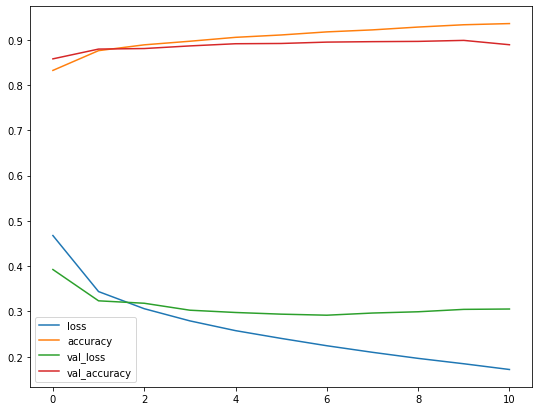

In [ ]:
hist = lenet5.fit(X_train, y_train, epochs=11, validation_data=(X_val, y_val))
plot_cat_history(hist.history, 11)

# Pretrained model


In [ ]:
resnet50 = keras.applications.resnet50.ResNet50()

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
photo = datasets.load_sample_image('china.jpg')/255.
photo = photo[np.newaxis, ...]
image_for_resnet = tf.image.resize(photo, (224, 224))
image_for_resnet.shape

TensorShape([1, 224, 224, 3])

(-0.5, 223.5, 223.5, -0.5)

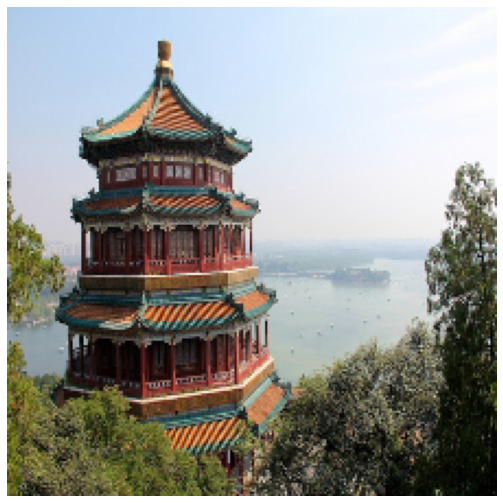

In [ ]:
plt.figure(figsize=(11, 9))
plt.imshow(image_for_resnet[0])
plt.axis('off')

In [ ]:
image_for_resnet_pad = tf.image.resize_with_pad(photo, 224, 224)
image_for_resnet.shape

TensorShape([1, 224, 224, 3])

(-0.5, 223.5, 223.5, -0.5)

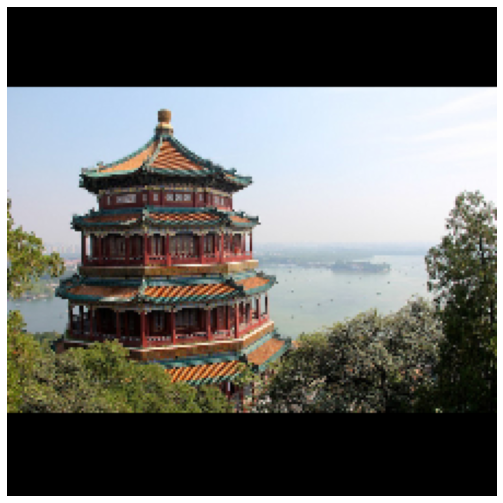

In [ ]:
plt.figure(figsize=(11, 9))
plt.imshow(image_for_resnet_pad[0])
plt.axis('off')

In [ ]:
image_for_resnet_crop_pad = tf.image.resize_with_crop_or_pad(photo, 224, 224, )
image_for_resnet_crop_pad.shape

TensorShape([1, 224, 224, 3])

(-0.5, 223.5, 223.5, -0.5)

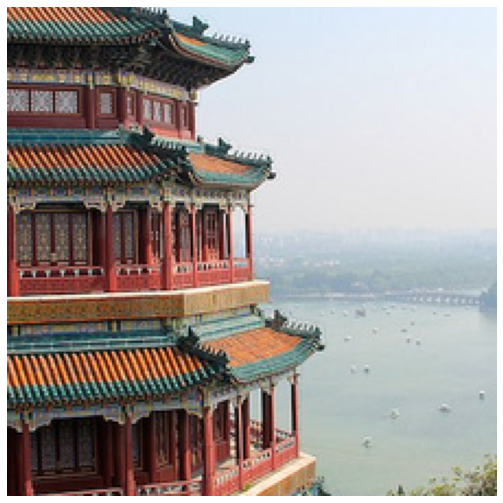

In [ ]:
plt.figure(figsize=(11, 9))
plt.imshow(image_for_resnet_crop_pad[0])
plt.axis('off')

In [ ]:
china_box = [0, 0.03, 1, 0.68]
photo_resized = tf.image.crop_and_resize(photo, [china_box], [0], crop_size=[224, 224])

(-0.5, 223.5, 223.5, -0.5)

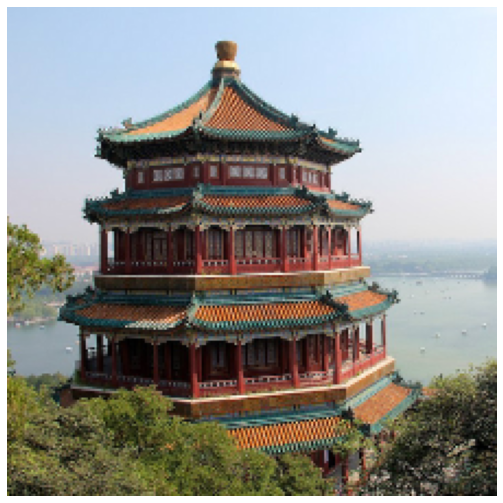

In [ ]:
plt.figure(figsize=(11, 9))
plt.imshow(photo_resized[0])
plt.axis('off')

In [ ]:
inputs = keras.applications.resnet50.preprocess_input(photo_resized * 255)
Y_proba = resnet50.predict(inputs)

1/1 [==============================] - 2s 2s/step


In [ ]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)

35363/35363 [==============================] - 0s 0us/step


In [ ]:
top_K

[[('n03877845', 'palace', 0.4339348),
  ('n02825657', 'bell_cote', 0.43074557),
  ('n03781244', 'monastery', 0.116950795)]]